[23:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent, verbose_eval } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

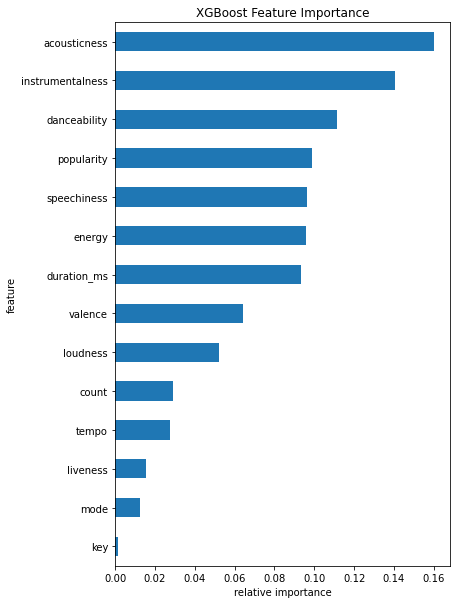

In [1]:
'''问题二'''
'''机器学习代码'''
import numpy as np
import pandas as pd
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
if __name__ == '__main__':
    train = pd.read_csv("TempData/temp06.csv")

    params = {
        'objective': 'multi:softmax',
        'num_class':20,
        'min_child_weight': 100,
        'eta': 0.02,
        'colsample_bytree': 0.7,
        'max_depth': 12,
        'subsample': 0.7,
        'alpha': 1,
        'gamma': 1,
        'silent': 0,
        'verbose_eval': True,
        'seed': 12
    }
    rounds = 200

    y = train['label']
    X = train.drop(columns=['label','artist_id'])

    xgtrain = xgb.DMatrix(X, label=y)
    bst = xgb.train(params, xgtrain, num_boost_round=rounds)

    features = [x for x in train.columns if x not in ['label','artist_id']]
    ceate_feature_map(features)

    importance = bst.get_fscore(fmap='xgb.fmap')
    importance = sorted(importance.items(), key=operator.itemgetter(1))

    df = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    df.to_csv("TempData/feat_importance.csv", index=False)
    plt.figure()
    df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')
    plt.show()

In [2]:
'''不抛弃噪声特征(原始数据聚类结果）'''
data = pd.read_csv("TempData/temp06.csv")
y = data[['label']]
X = data.drop(columns=['label','artist_id'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=921)
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training done')
answer_knn = knn.predict(X_test)
print('Prediction done')
print('\n\nThe classification report for knn:')
print(classification_report(y_test, answer_knn))

<ipython-input-2-da134936ebcf>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier().fit(X_train, y_train)
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training done
Prediction done


The classification report for knn:
              precision    recall  f1-score   support

           0       0.63      0.87      0.73       812
           1       0.45      0.31      0.37       220
           2       0.35      0.29      0.32       123
           3       0.56      0.65      0.60       115
           4       0.50      0.12      0.20        66
           5       0.37      0.34      0.36        56
           6       0.56      0.30      0.39        47
           7       0.24      0.08      0.12        63
           8       0.27      0.10      0.15        30
           9       0.14      0.03      0.06        29
          10       0.50      0.04      0.07        27
          11       0.00      0.00      0.00        26
          12       0.00      0.00      0.00        14
          13       0.83      0.83      0.83        12
          14       0.50      0.22      0.31        18
          15       0.00      0.00      0.00         9
          16  

In [3]:
'''抛弃了噪声特征(原始数据聚类结果）'''
data = pd.read_csv("TempData/temp06.csv")
y = data[['label']]
X = data.drop(columns=['label','artist_id','key','mode','liveness'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=921)
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training done')
answer_knn = knn.predict(X_test)
print('Prediction done')
print('\n\nThe classification report for knn:')
print(classification_report(y_test, answer_knn))

<ipython-input-3-94b739c258cf>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier().fit(X_train, y_train)
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training done
Prediction done


The classification report for knn:
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       812
           1       0.51      0.44      0.47       220
           2       0.34      0.28      0.30       123
           3       0.57      0.70      0.63       115
           4       0.38      0.15      0.22        66
           5       0.49      0.39      0.44        56
           6       0.59      0.43      0.49        47
           7       0.46      0.17      0.25        63
           8       0.33      0.20      0.25        30
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        27
          11       0.00      0.00      0.00        26
          12       0.29      0.14      0.19        14
          13       0.90      0.75      0.82        12
          14       0.47      0.44      0.46        18
          15       0.00      0.00      0.00         9
          16  

In [4]:
'''主成分聚类（没有抛弃特征前）'''
data = pd.read_csv("TempData/temp05.csv")
y = data[['label']]
X = data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=921)
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training done')
answer_knn = knn.predict(X_test)
print('Prediction done')
print('\n\nThe classification report for knn:')
print(classification_report(y_test, answer_knn))

KeyError: "None of [Index(['label'], dtype='object')] are in the [columns]"

In [5]:
'''主成分聚类，抛弃了特征后'''
data = pd.read_csv("TempData/temp07zhuchengfen_paoqihou.csv", encoding='utf-8')
y = data[['label']]
X = data.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=921)
knn = KNeighborsClassifier().fit(X_train, y_train)
print('Training done')
answer_knn = knn.predict(X_test)
print('Prediction done')
print('\n\nThe classification report for knn:')
print(classification_report(y_test, answer_knn))

Training done
Prediction done


The classification report for knn:
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       812
           1       0.46      0.35      0.40       220
           2       0.42      0.37      0.39       123
           3       0.58      0.69      0.63       115
           4       0.29      0.06      0.10        66
           5       0.36      0.29      0.32        56
           6       0.45      0.32      0.38        47
           7       0.44      0.22      0.29        63
           8       0.15      0.07      0.09        30
           9       0.33      0.07      0.11        29
          10       0.67      0.07      0.13        27
          11       0.67      0.08      0.14        26
          12       0.00      0.00      0.00        14
          13       0.77      0.83      0.80        12
          14       0.47      0.44      0.46        18
          15       1.00      0.22      0.36         9
          16  

<ipython-input-5-00001d54bcc1>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn = KNeighborsClassifier().fit(X_train, y_train)
F:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


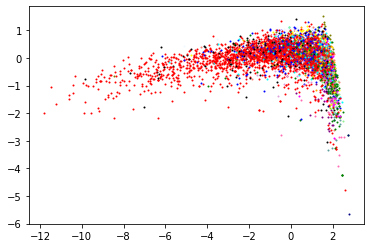

In [6]:
x=data['A'].tolist()
y=data['B'].tolist()
label = data['label'].tolist()
for i in range(len(label)):
    if (label[i]==0):
        plt.scatter(x[i],y[i],color='red',s=1)
    elif (label[i]==1):
        plt.scatter(x[i],y[i],color='Blue',s=1)
    elif (label[i]==2):
        plt.scatter(x[i],y[i],color='Cyan',s=1)
    elif (label[i]==3):
        plt.scatter(x[i],y[i],color='Green',s=1)
    elif (label[i]==4):
        plt.scatter(x[i],y[i],color='Black',s=1)
    elif (label[i]==5):
        plt.scatter(x[i],y[i],color='Magenta',s=1)
    elif (label[i]==6):
        plt.scatter(x[i],y[i],color='aliceblue',s=1)
    elif (label[i]==7):
        plt.scatter(x[i],y[i],color='Yellow',s=1)
    elif (label[i]==8):
        plt.scatter(x[i],y[i],color='Lightgreen',s=1)
    elif (label[i]==9):
        plt.scatter(x[i],y[i],color='Orange',s=1)
    elif (label[i]==10):
        plt.scatter(x[i],y[i],color='PLUM',s=1)
    elif (label[i]==11):
        plt.scatter(x[i],y[i],color='SALMON',s=1)
    elif (label[i]==12):
        plt.scatter(x[i],y[i],color='Hotpink',s=1)
    elif (label[i]==13):
        plt.scatter(x[i],y[i],color='Olive',s=1)
    elif (label[i]==14):
        plt.scatter(x[i],y[i],color='purple',s=1)
    elif (label[i]==15):
        plt.scatter(x[i],y[i],color='cadetblue',s=1)
    elif (label[i]==16):
        plt.scatter(x[i],y[i],color='lawngreen',s=1)
    elif (label[i]==17):
        plt.scatter(x[i],y[i],color='navy',s=1)
    elif (label[i]==18):
        plt.scatter(x[i],y[i],color='tan',s=1)
    elif (label[i]==19):
        plt.scatter(x[i],y[i],color='slategrey',s=1)
plt.savefig("Picture/question02_orginal_classification",dpi=2000)
plt.show()

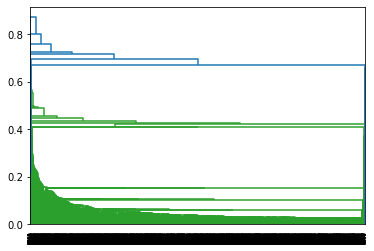

In [7]:
import scipy as sp
import scipy.cluster.hierarchy as sch
data1=data[['A','B']]
A=data1.values
B=sch.distance.pdist(A,metric='euclidean')
Z=sch.linkage(B,'single')
H=sch.dendrogram(Z,p=30)

In [8]:
from sklearn import preprocessing as pp
d=B
dd=sch.distance.squareform(d)
z=sch.linkage(d)
print(z)
'''系统聚类到此截至'''

[[1.93000000e+03 1.96500000e+03 0.00000000e+00 2.00000000e+00]
 [6.30000000e+01 6.60000000e+01 0.00000000e+00 2.00000000e+00]
 [1.75000000e+02 1.76000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [4.92300000e+03 1.11990000e+04 7.60468085e-01 5.60000000e+03]
 [2.88200000e+03 1.12000000e+04 8.03372567e-01 5.60100000e+03]
 [5.34400000e+03 1.12010000e+04 8.72834502e-01 5.60200000e+03]]


'系统聚类到此截至'

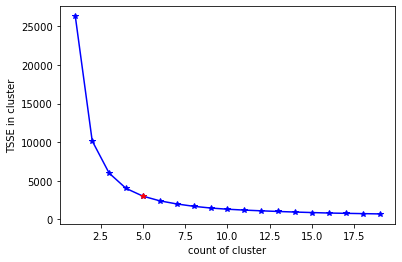

In [9]:
'''蔟内理查平方和拐点法'''
from sklearn.cluster import KMeans
TSSE=[]
K=19
for k in range(1,K+1):
    SSE=[]
    md=KMeans(n_clusters=k)
    md.fit(A)
    labels=md.labels_
    centers=md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((A[labels==label,:]-centers[label,:])**2))
    TSSE.append(np.sum(SSE))
plt.figure(2)
plt.plot(range(1,K+1),TSSE,'b*-')
plt.plot(5,TSSE[4],'r*')
plt.xlabel("count of cluster")
plt.ylabel("TSSE in cluster")
plt.show()

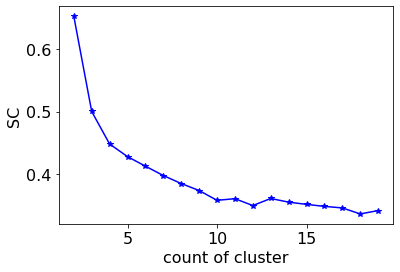

In [11]:
from sklearn import metrics
S=[]
X=A
for k in range(2,K+1):
    md=KMeans(k)
    md.fit(A)
    labels=md.labels_
    S.append(metrics.silhouette_score(X,labels,metric='euclidean'))
plt.rc('font',size=16)
plt.plot(range(2,K+1),S,'b*-')
plt.xlabel('count of cluster')
plt.ylabel('SC')
plt.show()

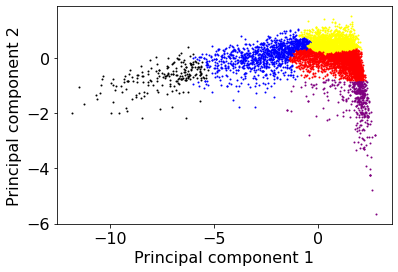

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
final_cluster=pd.read_csv("TempData/question2_final_cluster.csv",encoding='utf-8')
data = pd.read_csv("TempData/q2_cluster_location.csv", encoding='utf-8')
final_data=pd.merge(final_cluster,data,on='id',how='inner')
final_data=final_data[['A','B','cluster']]
final_data
for i in range(final_data.shape[0]):
    x=final_data.iloc[i,0]
    y=final_data.iloc[i,1]
    cluster=final_data.iloc[i,2]
    if cluster==1:
        plt.scatter(x,y,color='Yellow',s=1)
    elif cluster==2:
        plt.scatter(x,y,color='red',s=1)
    elif cluster==3:
        plt.scatter(x,y,color='black',s=1)
    elif cluster==4:
        plt.scatter(x,y,color='blue',s=1)
    elif cluster==5:
        plt.scatter(x,y,color='purple',s=1)
plt.savefig("Picture/final_claster.png",dpi=1000)
plt.xlabel("Principal component 1")
plt.ylabel('Principal component 2')
plt.show()

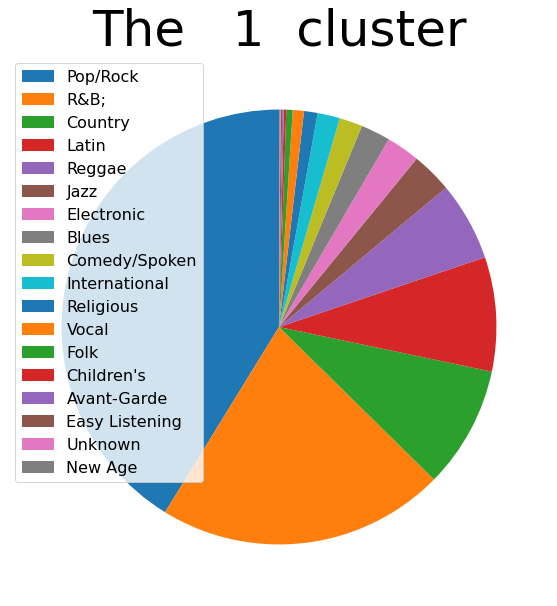

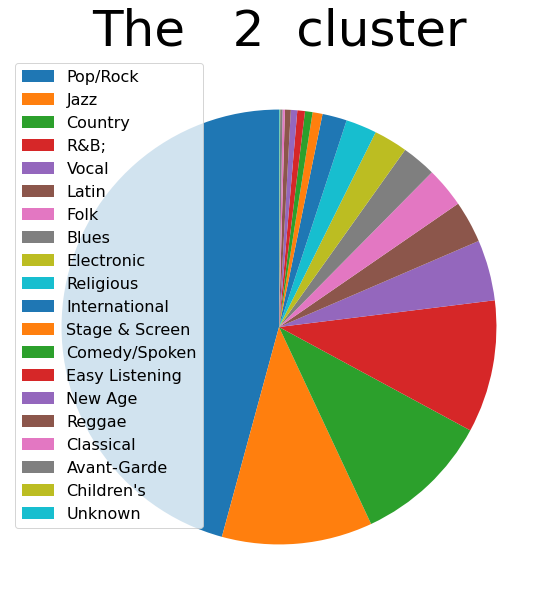

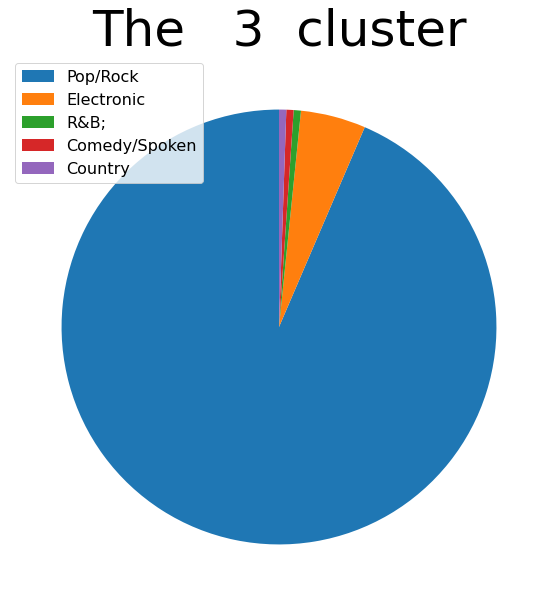

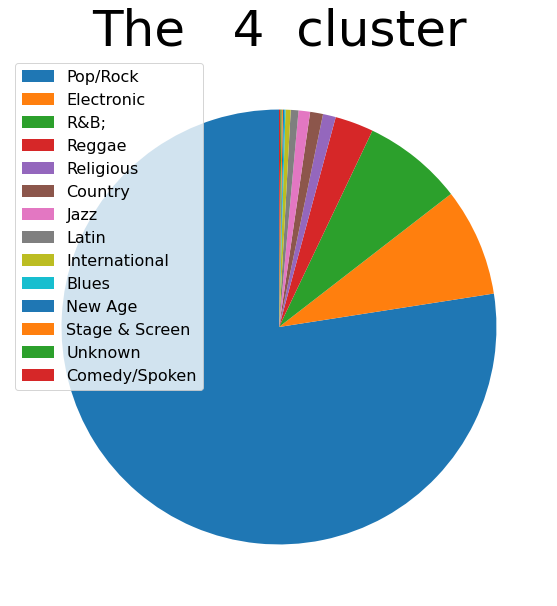

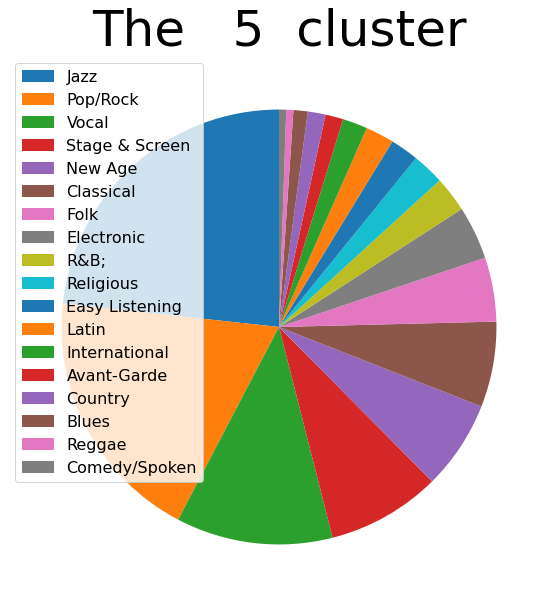

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cluster=pd.read_csv("TempData/question2_final_cluster.csv",encoding='utf-8')
type=pd.read_csv('TempData/q2new_data.csv',encoding='utf-8')
data=pd.merge(type,cluster,left_on='artist_id',right_on='id',how='inner')
data=data[['cluster','type']]
group=data.groupby(['cluster'])
for a,b in group:
    class_title="The"+"   "+str(a)+"  "+"cluster"
    class_count=b['type'].value_counts()
    class_percent=class_count/class_count.sum()
    labels=list(class_percent.index)
    plt.figure(figsize=(10,10))
    plt.pie(class_percent,shadow=False,startangle=90)
    plt.legend(labels)
    plt.legend(labels)
    plt.title(class_title,size=50)
    plt.savefig('Picture/q2pie_'+str(a)+".png",dpi=1000)
    plt.show()

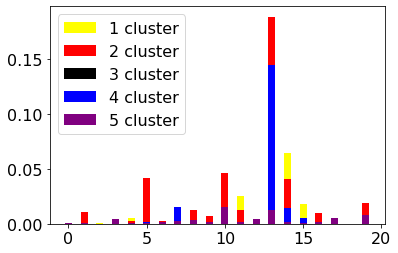

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plot_data=data.groupby(['type']).count()
labels=list(plot_data.index)
plot_data=data.groupby(['type'])
cluster_count=[]
for cluster in range(1,6):
    type_count=[]
    for a,b in plot_data:
        type_cluster=b[b['cluster']==cluster].shape[0]
        type_count.append(type_cluster)
    cluster_count.append(type_count)
cluster_count=np.array(cluster_count)
cluster_count=cluster_count/5602
N=20
width=0.45
ind=np.arange(N)
p0=plt.bar(ind,cluster_count[0],width,color='Yellow',label='1 cluster')
p1=plt.bar(ind,cluster_count[1],width,color='red',label='2 cluster')
p2=plt.bar(ind,cluster_count[2],width,color='black',label='3 cluster')
p3=plt.bar(ind,cluster_count[3],width,color='blue',label='4 cluster')
p4=plt.bar(ind,cluster_count[4],width,color='purple',label='5 cluster')
plt.legend()
plt.show()
